In [1]:
import numpy as np
import pandas as pd
import matplotlib as mtl
import os
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

In [2]:
root_dir = os.getcwd()
print (os.getcwd()) # cwd = current working directory

C:\Users\aksil\DataScience_IA


In [3]:
dataset_dir = os.path.join(root_dir,"Datasets")
print(dataset_dir)

C:\Users\aksil\DataScience_IA\Datasets


In [4]:
dataset = "Telco_customer_churn.csv"
df = pd.read_csv(os.path.join(dataset_dir,dataset))

In [5]:
df.head()
df.dtypes


CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

<Axes: xlabel='Churn Value', ylabel='count'>

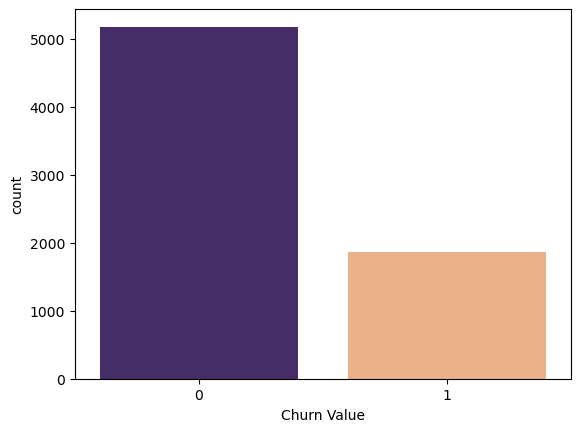

In [6]:
sns.countplot(x='Churn Value', data=df, palette=['#432371',"#FAAE7B"])

In [7]:
df = df.drop(['CustomerID', 'Count', 'Lat Long'], axis=1)

df = pd.get_dummies(df, drop_first=True)

df = df.dropna()

X = df.drop('Churn Label_Yes', axis=1)
y = df['Churn Label_Yes']


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7189496096522356


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

param_grid = {'C': [0.1, 1, 10],
              'gamma': [0.1, 1, 10],
              'kernel': ['linear', 'rbf']}

model = SVC()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

final_model = SVC(**best_params)
final_model.fit(X_train, y_train)
accuracy = final_model.score(X_test, y_test)

print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Final Model Accuracy:", accuracy)

